In [7]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv('data_lst.csv')
df.head()

,date,station,temperature,green,red,nir,swir1,swir2,lst
0,2023-08-24,4,33.0,3256,3412,3878,3775,3288,313.0
1,2023-08-24,8,32.2,2046,2074,3934,3068,2641,308.0
2,2023-08-24,16,30.6,2110,2114,3736,2787,2291,308.0
3,2023-08-24,18,31.7,1578,1636,3810,2981,2507,306.0
4,2023-08-24,24,31.2,3046,3580,4428,4747,4065,312.0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

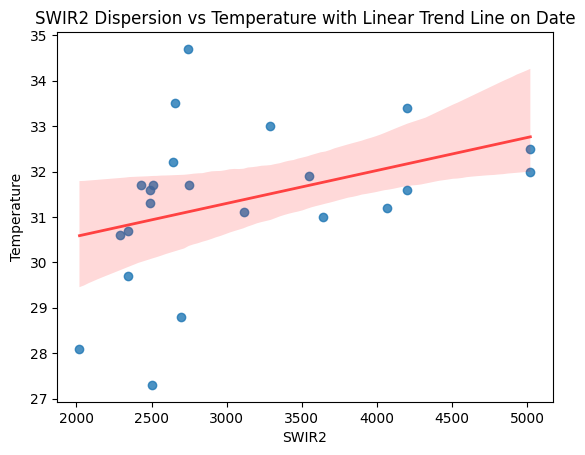

In [21]:
sns.regplot(x=df['swir2'], y=df['temperature'], line_kws={'color':'r', 'alpha':0.7, 'lw':2})
plt.xlabel('SWIR2')
plt.ylabel('Temperature')
plt.title('SWIR2 Dispersion vs Temperature with Linear Trend Line on Date')
plt.show()

In [22]:
correlation, p_value = stats.spearmanr(df['swir2'], df['temperature'])
print(f'Spearman correlation coefficient: {correlation}, p-value: {p_value}')

Spearman correlation coefficient: 0.5126238251916303, p-value: 0.012379987351198692


In [13]:
nir = df['nir']
red = df['red']
ndvi = (nir - red) / (nir + red)

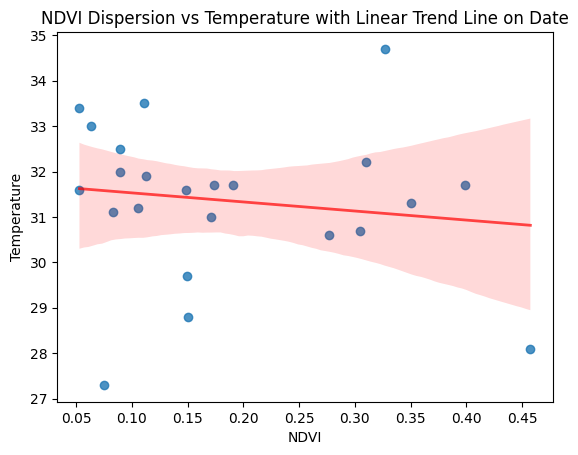

In [14]:
sns.regplot(x=ndvi, y=df['temperature'], line_kws={'color':'r', 'alpha':0.7, 'lw':2})
plt.xlabel('NDVI')
plt.ylabel('Temperature')
plt.title('NDVI Dispersion vs Temperature with Linear Trend Line on Date')
plt.show()

In [16]:
correlation, p_value = stats.spearmanr(ndvi, df['temperature'])
print(f'Spearman correlation coefficient: {correlation}, p-value: {p_value}')

Spearman correlation coefficient: -0.18881470187116792, p-value: 0.3882336630455674
